In [ ]:
# Loading data :-

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
comments = pd.read_csv(r"C:\Users\Acer\Downloads\UScomments.csv",on_bad_lines='skip')


C:\Users\Acer\AppData\Local\Temp\ipykernel_9468\459206173.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [17]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [18]:
comments.dropna(inplace= True)

In [19]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
# Performing sentiment analysis :-

In [20]:
!pip install textblob

In [21]:
from textblob import TextBlob

In [22]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [23]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [24]:
comments.shape

(691374, 4)

In [25]:
sample_df= comments[0:1000]

In [26]:
sample_df.shape

(1000, 4)

In [27]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [28]:
len(polarity)

691374

In [29]:
comments['polarity'] = polarity

In [30]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [ ]:
# Performing wordcloud analysis :-

In [31]:
filter1= comments['polarity']==1

In [32]:
comments_positive = comments[filter1]

In [33]:
filter2= comments['polarity']== -1

In [34]:
comments_negative = comments[filter2]

In [35]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud , STOPWORDS

In [38]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [39]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [40]:
type(comments['comment_text'])

pandas.core.series.Series

In [41]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [42]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

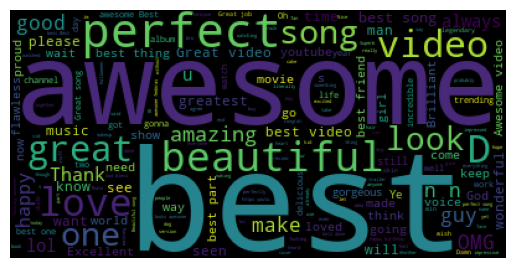

In [43]:
plt.imshow(wordcloud)
plt.axis('off')

In [44]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [45]:
wordcloud2 = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

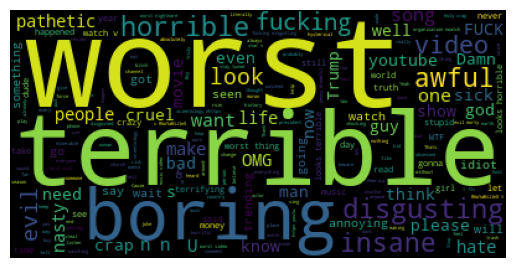

In [46]:
plt.imshow(wordcloud2)
plt.axis('off')

In [47]:
# Performing emoji analysis :-

In [48]:
!pip install emoji==2.2.0

In [49]:
import emoji

In [50]:
emoji.__version__

'2.2.0'

In [51]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [52]:
comment = 'trending 😉'

In [53]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [54]:
all_emoji_list=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [55]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [56]:
from collections import Counter

In [57]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [58]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [59]:
Counter(all_emoji_list).most_common(10)[2]

('❤', 31119)

In [60]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [61]:
Counter(all_emoji_list).most_common(10)[4][0]

'😭'

In [62]:
emoji = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [63]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [64]:
Counter(all_emoji_list).most_common(10)[2][1]

31119

In [65]:
Counter(all_emoji_list).most_common(10)[3][1]

8694

In [66]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [67]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [68]:
trace = go.Bar(x=emoji , y=freqs)

In [70]:
iplot([trace])

In [71]:
# Collecting entire data of Youtube :

In [72]:
import os

In [73]:
files = os.listdir(r'C:\Users\Acer\Downloads\additional_data-20231128T071358Z-001\additional_data')

In [74]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [75]:
files_csv = [file for file in files if '.csv' in file]

In [76]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [77]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [80]:
full_df = pd.DataFrame()
path = r'C:\Users\Acer\Downloads\additional_data-20231128T071358Z-001\additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding = "iso-8859-1" , on_bad_lines='skip')
    full_df = pd.concat([full_df , current_df] , ignore_index = True)

In [81]:
full_df.shape

(375942, 16)

In [82]:
#Exporting data:-

In [85]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [86]:
full_df = full_df.drop_duplicates()

In [87]:
full_df.shape

(339525, 16)

In [90]:
full_df[0:1000].to_csv(r'D:\YouTube-Case-Study/youtube_sample.csv',index=False)

In [91]:
full_df[0:1000].to_json(r'D:\YouTube-Case-Study/youtube_sample.json')

In [92]:
from sqlalchemy import create_engine

In [93]:
engine = create_engine(r'sqlite:///D:\YouTube-Case-Study/youtube_sample.sqlite')

In [94]:
full_df[0:1000].to_sql('Users', con=engine, if_exists='append')

1000

In [ ]:
# Analysing the most liked category!

In [97]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [98]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [100]:
json_df = pd.read_json(r'C:\Users\Acer\Downloads\additional_data-20231128T071358Z-001\additional_data\US_category_id.json')

In [101]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [102]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [103]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [104]:
json_df['items'][2]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
 'id': '10',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Music',
  'assignable': True}}

In [109]:
cat_dict={}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [110]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [113]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [115]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

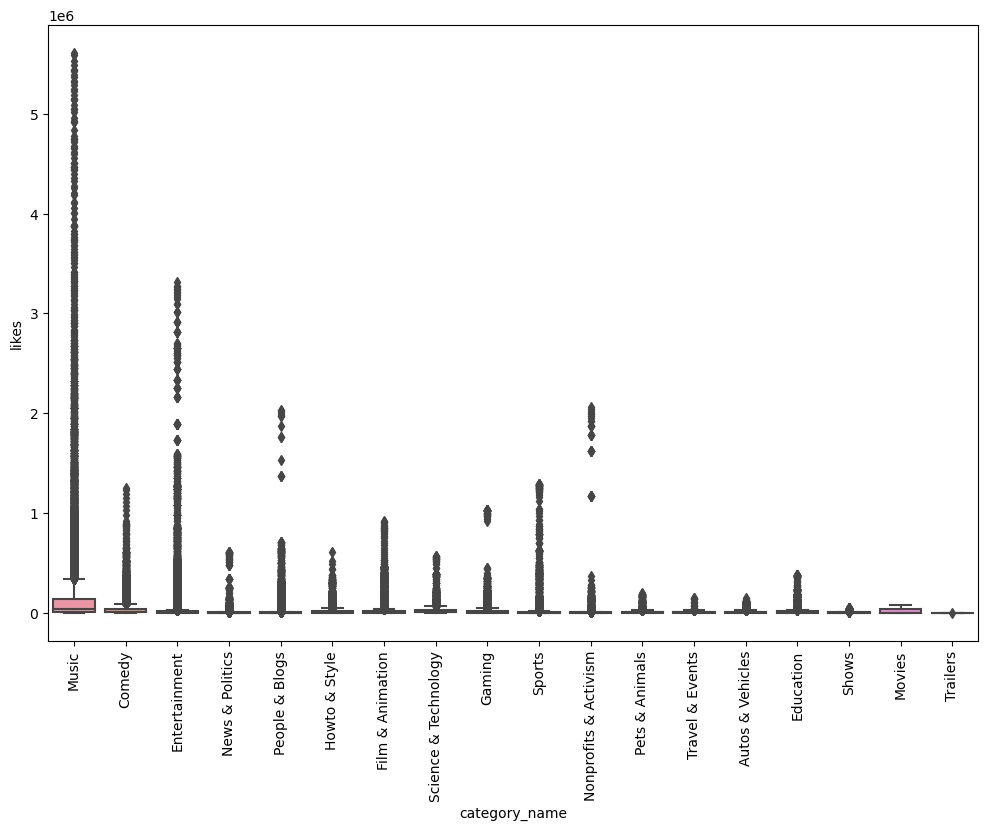

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes',data = full_df)
plt.xticks(rotation='vertical')

In [ ]:
# Analysing whether audience is engaged or not!

In [119]:
full_df['like_rate'] = full_df['likes']/full_df['views']*100
full_df['dislike_rate'] = full_df['dislikes']/full_df['views']*100
full_df['comment_count_rate'] = full_df['comment_count']/full_df['views']*100

In [120]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

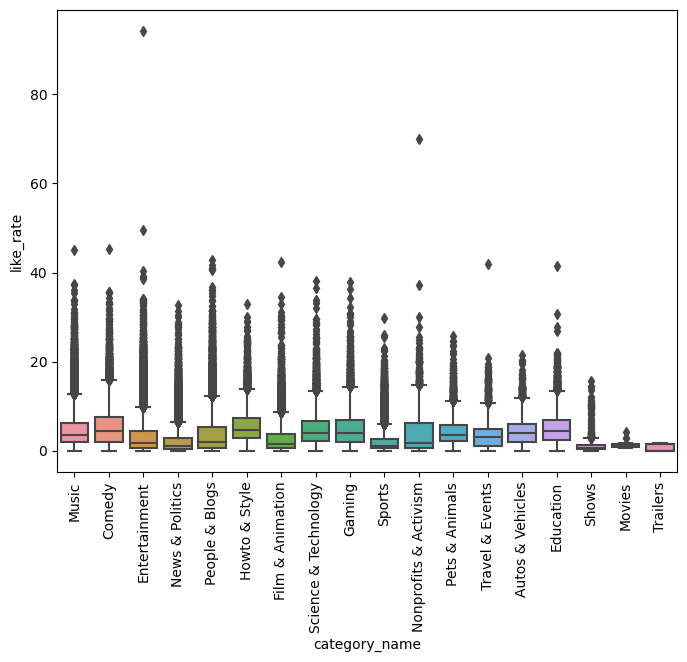

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate',data = full_df)
plt.xticks(rotation='vertical')

<Axes: xlabel='views', ylabel='likes'>

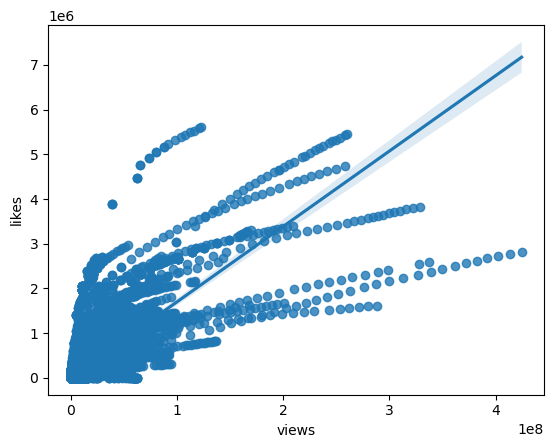

In [123]:
sns.regplot(x='views', y='likes', data=full_df)

In [125]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [127]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

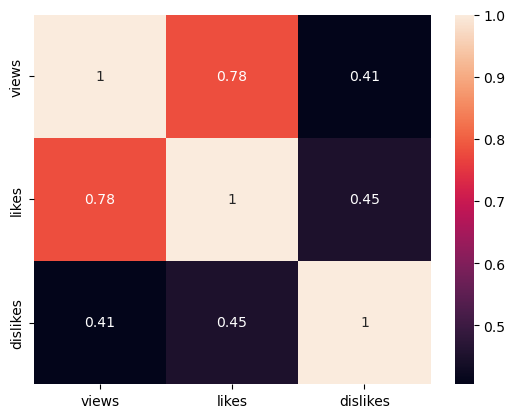

In [129]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

In [ ]:
# Analysing trending videos :-

In [130]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [134]:
cdf = full_df['channel_title'].value_counts().reset_index()

In [135]:
cdf

,channel_title,count
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Daas,1
37820,YT Industries,1
37821,BTLV Le mÃ©dia complÃ©mentaire,1
37822,Quem Sabia ?,1


In [136]:
import plotly.express as px

In [138]:
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'count')